#Atividade – Análise Exploratória de Dados (AED)

Disciplina: Mineração de Dados Estruturados

AD2



Link para extração da base de dados:

https://archive.ics.uci.edu/ml/datasets/Online+Retail

- Importando as bibliotecas para análise

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D





 - Carregar dos dados e verificar conteúdo




In [3]:
df = pd.read_excel('Online Retail.xlsx')

print("=== EXPLORAÇÃO INICIAL DOS DADOS ===")
print(f"Dimensões do dataset: {df.shape}")
print(f"Período dos dados: {df['InvoiceDate'].min()} até {df['InvoiceDate'].max()}")
print("primeiras linhas do arquivo")
print(df.head())
print("\nInformações sobre as variáveis:")
print(df.info())

=== EXPLORAÇÃO INICIAL DOS DADOS ===
Dimensões do dataset: (541909, 8)
Período dos dados: 2010-12-01 08:26:00 até 2011-12-09 12:50:00
primeiras linhas do arquivo
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  

Informações sobre as variá

- Análise das Variáveis

In [4]:
# Estatísticas descritivas
print("=== ESTATÍSTICAS DESCRITIVAS ===")
print(df.describe())

# Análise de valores ausentes
print("\n=== VALORES AUSENTES ===")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_info = pd.DataFrame({
    'Valores Ausentes': missing_data,
    'Percentual (%)': missing_percent
})
print(missing_info)

# Análise de países
print("\n=== DISTRIBUIÇÃO POR PAÍS ===")
country_counts = df['Country'].value_counts()
print(f"Total de países: {len(country_counts)}")
print(f"Top 10 países:\n{country_counts.head(10)}")

=== ESTATÍSTICAS DESCRITIVAS ===
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  

=== VALORES AUSENTES ===
             Valores Ausentes  Percentual (%)
InvoiceNo                   0        0.000000
StockCode  

- Visualizações exploratórias

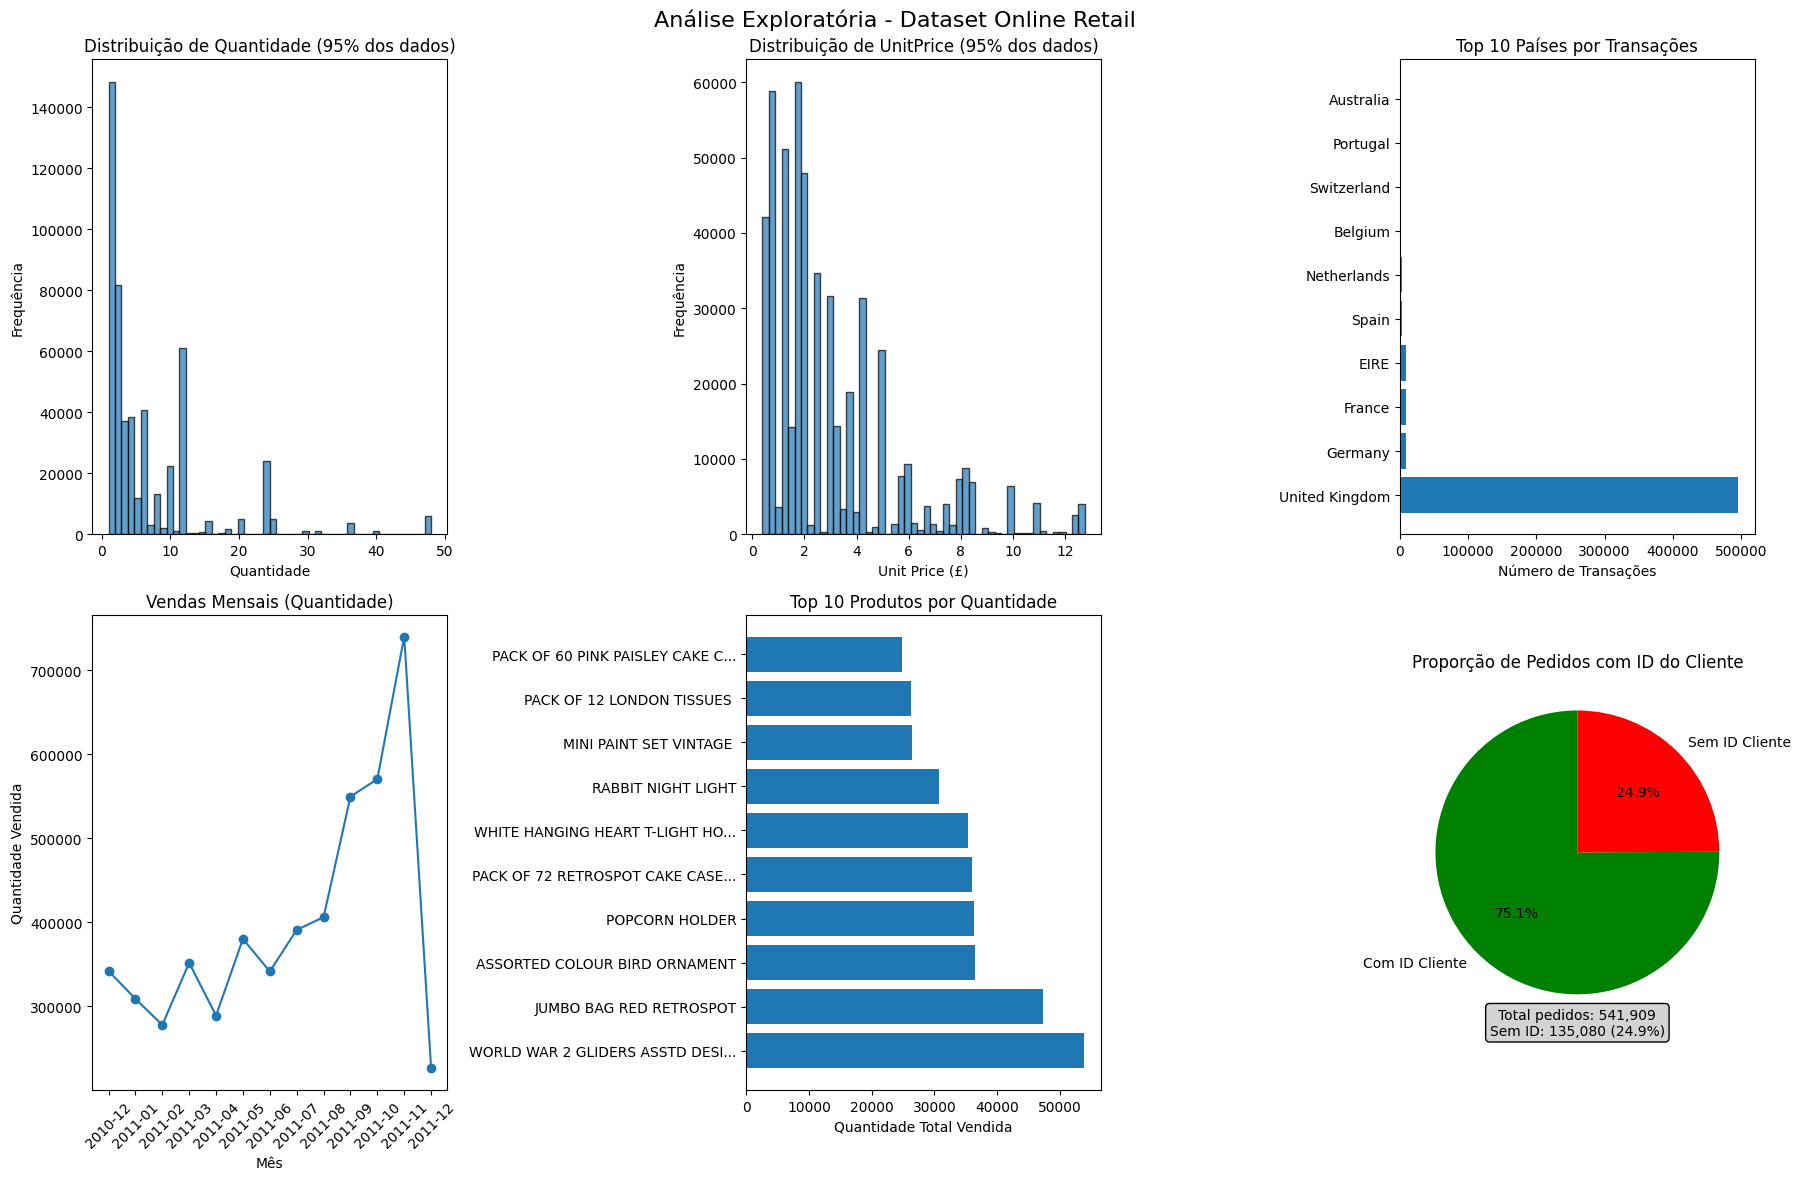


=== ANÁLISE DETALHADA DE PEDIDOS SEM CUSTOMERID ===
Total de pedidos sem CustomerID: 135,080
Percentual sobre o total: 24.93%
Valor total dos pedidos sem CustomerID: £1447682.12
Média de itens por pedido sem CustomerID: 2.00

Top 5 países com pedidos sem CustomerID:
Country
United Kingdom    133600
EIRE                 711
Hong Kong            288
Unspecified          202
Switzerland          125
Name: count, dtype: int64

Período dos pedidos sem CustomerID:
De: 2010-12-01 11:52:00
Até: 2011-12-09 10:26:00

Top 5 produtos mais vendidos em pedidos sem CustomerID:
  - CHARLOTTE BAG SUKI DESIGN: 9177 unidades
  - POPCORN HOLDER: 5830 unidades
  - RED RETROSPOT CHARLOTTE BAG: 4962 unidades
  - WOODLAND CHARLOTTE BAG: 4073 unidades
  - PAPER CHAIN KIT 50'S CHRISTMAS : 3738 unidades

=== COMPARAÇÃO: PEDIDOS COM VS SEM CUSTOMERID ===
Valor médio por transação:
  - Com CustomerID: £20.40
  - Sem CustomerID: £10.72
Quantidade média por transação:
  - Com CustomerID: 12.06 unidades
  - Sem Cust

In [5]:
# Configuração de subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Análise Exploratória - Dataset Online Retail', fontsize=16)

# 1. Distribuição de Quantidade (com escala ajustada)
# Filtrar para mostrar distribuição mais realista (95% dos dados)
q_low = df['Quantity'].quantile(0.025)
q_high = df['Quantity'].quantile(0.975)
filtered_quantity = df['Quantity'][(df['Quantity'] >= q_low) & (df['Quantity'] <= q_high)]

axes[0,0].hist(filtered_quantity, bins=50, edgecolor='black', alpha=0.7)
axes[0,0].set_title('Distribuição de Quantidade (95% dos dados)')
axes[0,0].set_xlabel('Quantidade')
axes[0,0].set_ylabel('Frequência')

# 2. Distribuição de UnitPrice (com escala ajustada)
# Filtrar para mostrar distribuição mais realista (95% dos dados)
p_low = df['UnitPrice'].quantile(0.025)
p_high = df['UnitPrice'].quantile(0.975)
filtered_price = df['UnitPrice'][(df['UnitPrice'] >= p_low) & (df['UnitPrice'] <= p_high)]

axes[0,1].hist(filtered_price, bins=50, edgecolor='black', alpha=0.7)
axes[0,1].set_title('Distribuição de UnitPrice (95% dos dados)')
axes[0,1].set_xlabel('Unit Price (£)')
axes[0,1].set_ylabel('Frequência')

# 3. Top 10 países por número de transações
top_countries = df['Country'].value_counts().head(10)
axes[0,2].barh(range(len(top_countries)), top_countries.values)
axes[0,2].set_yticks(range(len(top_countries)))
axes[0,2].set_yticklabels(top_countries.index)
axes[0,2].set_title('Top 10 Países por Transações')
axes[0,2].set_xlabel('Número de Transações')

# 4. Vendas ao longo do tempo (mensal)
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()
axes[1,0].plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o')
axes[1,0].set_title('Vendas Mensais (Quantidade)')
axes[1,0].set_xlabel('Mês')
axes[1,0].set_ylabel('Quantidade Vendida')
axes[1,0].tick_params(axis='x', rotation=45)

# 5. Top 10 produtos mais vendidos por quantidade
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
axes[1,1].barh(range(len(top_products)), top_products.values)
axes[1,1].set_yticks(range(len(top_products)))
axes[1,1].set_yticklabels([desc[:30] + '...' if len(desc) > 30 else desc for desc in top_products.index])
axes[1,1].set_title('Top 10 Produtos por Quantidade')
axes[1,1].set_xlabel('Quantidade Total Vendida')

# 6. Proporção de pedidos com ID do cliente
customer_id_status = df['CustomerID'].isna()
customer_status_counts = customer_id_status.value_counts()
customer_status_labels = ['Com ID Cliente', 'Sem ID Cliente']
colors = ['green', 'red']

axes[1,2].pie(customer_status_counts.values, labels=customer_status_labels,
              autopct='%1.1f%%', colors=colors, startangle=90)
axes[1,2].set_title('Proporção de Pedidos com ID do Cliente')

# Adicionar informações numéricas no gráfico
total_orders = len(df)
orders_without_id = customer_status_counts[True]
axes[1,2].text(0, -1.2, f'Total pedidos: {total_orders:,}\nSem ID: {orders_without_id:,} ({orders_without_id/total_orders*100:.1f}%)',
               ha='center', va='center', fontsize=10,
               bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))

plt.tight_layout()
plt.savefig('exploratory_analysis_improved.png', dpi=300, bbox_inches='tight')
plt.show()

# Análise adicional sobre pedidos sem CustomerID
print("\n=== ANÁLISE DETALHADA DE PEDIDOS SEM CUSTOMERID ===")
orders_without_customer = df[df['CustomerID'].isna()]
print(f"Total de pedidos sem CustomerID: {len(orders_without_customer):,}")
print(f"Percentual sobre o total: {len(orders_without_customer)/len(df)*100:.2f}%")

if len(orders_without_customer) > 0:
    # Calcular o valor total corretamente
    total_value_no_customer = (orders_without_customer['Quantity'] * orders_without_customer['UnitPrice']).sum()
    print(f"Valor total dos pedidos sem CustomerID: £{total_value_no_customer:.2f}")

    print(f"Média de itens por pedido sem CustomerID: {orders_without_customer['Quantity'].mean():.2f}")

    # Países com mais pedidos sem CustomerID
    print(f"\nTop 5 países com pedidos sem CustomerID:")
    print(orders_without_customer['Country'].value_counts().head())

    # Análise temporal
    print(f"\nPeríodo dos pedidos sem CustomerID:")
    print(f"De: {orders_without_customer['InvoiceDate'].min()}")
    print(f"Até: {orders_without_customer['InvoiceDate'].max()}")

    # Análise de produtos em pedidos sem CustomerID
    print(f"\nTop 5 produtos mais vendidos em pedidos sem CustomerID:")
    top_products_no_id = orders_without_customer.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5)
    for product, qty in top_products_no_id.items():
        print(f"  - {product}: {qty} unidades")

# Análise adicional: Comparação entre pedidos com e sem CustomerID
print("\n=== COMPARAÇÃO: PEDIDOS COM VS SEM CUSTOMERID ===")
orders_with_customer = df[df['CustomerID'].notna()]

if len(orders_with_customer) > 0 and len(orders_without_customer) > 0:
    avg_value_with_id = (orders_with_customer['Quantity'] * orders_with_customer['UnitPrice']).mean()
    avg_value_without_id = (orders_without_customer['Quantity'] * orders_without_customer['UnitPrice']).mean()

    print(f"Valor médio por transação:")
    print(f"  - Com CustomerID: £{avg_value_with_id:.2f}")
    print(f"  - Sem CustomerID: £{avg_value_without_id:.2f}")

    avg_qty_with_id = orders_with_customer['Quantity'].mean()
    avg_qty_without_id = orders_without_customer['Quantity'].mean()

    print(f"Quantidade média por transação:")
    print(f"  - Com CustomerID: {avg_qty_with_id:.2f} unidades")
    print(f"  - Sem CustomerID: {avg_qty_without_id:.2f} unidades")

- Pré processamento dos dados

- Limpeza e tratamento de dados





--- Análise de valores negativos



--- Primeiro análise de preços negativos.

In [6]:
def analise_precos_negativos(df):
    # ANÁLISE DE PREÇOS NEGATIVOS
    print("\n INVOICES COM PREÇO NEGATIVO (UnitPrice < 0)")
    print("-" * 50)

    negative_price = df[df['UnitPrice'] < 0]
    print(f"Total de registros com preço negativo: {len(negative_price)}")
    print(f"Percentual sobre o total: {len(negative_price)/len(df)*100:.4f}%")

    if len(negative_price) > 0:
        # Estatísticas básicas
        print(f"\n Estatísticas dos preços negativos:")
        print(f"   Mínimo: £{negative_price['UnitPrice'].min():.2f}")
        print(f"   Máximo: £{negative_price['UnitPrice'].max():.2f}")
        print(f"   Média: £{negative_price['UnitPrice'].mean():.2f}")

        # Invoices únicas com preço negativo
        negative_price_invoices = negative_price['InvoiceNo'].unique()
        print(f"\n Invoices únicas com preço negativo: {len(negative_price_invoices)}")

        # Exibir até 10 exemplos
        print(f"\n Exemplos de registros com preço negativo (limitado a 10):")
        for idx, row in negative_price.head(10).iterrows():
            print(f"\n--- Exemplo {idx+1} ---")
            print(f"InvoiceNo: {row['InvoiceNo']}")
            print(f"StockCode: {row['StockCode']}")
            print(f"Description: {row['Description']}")
            print(f"Quantity: {row['Quantity']}")
            print(f"UnitPrice: £{row['UnitPrice']:.2f}")
            print(f"CustomerID: {row['CustomerID']}")
            print(f"Country: {row['Country']}")
            print(f"InvoiceDate: {row['InvoiceDate']}")
            total_val = row['Quantity'] * row['UnitPrice']
            print(f"Total Value: £{total_val:.2f}")

            # Verificar se também tem quantidade negativa
            if row['Quantity'] < 0:
                print(f"  ATENÇÃO: Também tem quantidade negativa!")

    else:
        print(" Nenhum registro com preço negativo encontrado.")
print("INICIANDO ANÁLISE COMPLETA DE PREÇOS NEGATIVOS...")
results = analise_precos_negativos(df)
print("\n" + "=" * 80)
print("ANÁLISE CONCLUÍDA - PRÓXIMOS PASSOS")
print("=" * 80)

INICIANDO ANÁLISE COMPLETA DE PREÇOS NEGATIVOS...

 INVOICES COM PREÇO NEGATIVO (UnitPrice < 0)
--------------------------------------------------
Total de registros com preço negativo: 2
Percentual sobre o total: 0.0004%

 Estatísticas dos preços negativos:
   Mínimo: £-11062.06
   Máximo: £-11062.06
   Média: £-11062.06

 Invoices únicas com preço negativo: 2

 Exemplos de registros com preço negativo (limitado a 10):

--- Exemplo 299984 ---
InvoiceNo: A563186
StockCode: B
Description: Adjust bad debt
Quantity: 1
UnitPrice: £-11062.06
CustomerID: nan
Country: United Kingdom
InvoiceDate: 2011-08-12 14:51:00
Total Value: £-11062.06

--- Exemplo 299985 ---
InvoiceNo: A563187
StockCode: B
Description: Adjust bad debt
Quantity: 1
UnitPrice: £-11062.06
CustomerID: nan
Country: United Kingdom
InvoiceDate: 2011-08-12 14:52:00
Total Value: £-11062.06

ANÁLISE CONCLUÍDA - PRÓXIMOS PASSOS


- Identificamos que InvoiceNo iniciadas por A são ajustes contábeis (Ajustar dívidas inadimplentes).

--- Análise quantidade negativa

In [7]:
def analise_qtd_negativas(df):

    print("=" * 80)
    print("ANÁLISE DE QUANTIDADES NEGATIVAS")
    print("=" * 80)

    # ANÁLISE DE QUANTIDADES NEGATIVAS
    print("\n\n REGISTROS COM QUANTIDADE NEGATIVA (Quantity < 0)")
    print("-" * 50)

    negative_quantity = df[df['Quantity'] < 0]
    print(f"Total de registros com quantidade negativa: {len(negative_quantity)}")
    print(f"Percentual sobre o total: {len(negative_quantity)/len(df)*100:.2f}%")

    if len(negative_quantity) > 0:
        # Estatísticas básicas
        print(f"\n Estatísticas das quantidades negativas:")
        print(f"   Mínimo: {negative_quantity['Quantity'].min()}")
        print(f"   Máximo: {negative_quantity['Quantity'].max()}")
        print(f"   Média: {negative_quantity['Quantity'].mean():.2f}")
        print(f"   Mediana: {negative_quantity['Quantity'].median():.2f}")

        # Análise dos primeiros caracteres do InvoiceNo
        print(f"\n ANÁLISE DOS PRIMEIROS CARACTERES DO INVOICENO:")
        invoice_patterns = negative_quantity['InvoiceNo'].astype(str).str[0].value_counts()

        total_negative = len(negative_quantity)
        for char, count in invoice_patterns.items():
            percentage = (count / total_negative) * 100
            print(f"  '{char}': {count} registros ({percentage:.1f}%)")


print("INICIANDO ANÁLISE DE QUANTIDADES NEGATIVAS...")
results = analise_qtd_negativas(df)

print("\n" + "=" * 80)
print("ANÁLISE CONCLUÍDA - PRÓXIMOS PASSOS")
print("=" * 80)

INICIANDO ANÁLISE DE QUANTIDADES NEGATIVAS...
ANÁLISE DE QUANTIDADES NEGATIVAS


 REGISTROS COM QUANTIDADE NEGATIVA (Quantity < 0)
--------------------------------------------------
Total de registros com quantidade negativa: 10624
Percentual sobre o total: 1.96%

 Estatísticas das quantidades negativas:
   Mínimo: -80995
   Máximo: -1
   Média: -45.61
   Mediana: -2.00

 ANÁLISE DOS PRIMEIROS CARACTERES DO INVOICENO:
  'C': 9288 registros (87.4%)
  '5': 1336 registros (12.6%)

ANÁLISE CONCLUÍDA - PRÓXIMOS PASSOS


--- Verificamos dois tipos de Invoice com quantidade negativa.

In [8]:
def analise_padrao_invoice(df):
    """
    Análise exploratória detalhada com amostras balanceadas dos dois padrões
    """
    print("=" * 80)
    print("ANÁLISE EXPLORATÓRIA - PADRÕES DE INVOICE NEGATIVOS")
    print("=" * 80)

    negative_quantity = df[df['Quantity'] < 0]

    # Separar os dois padrões principais
    pattern_c = negative_quantity[negative_quantity['InvoiceNo'].astype(str).str.startswith('C')]
    pattern_5 = negative_quantity[negative_quantity['InvoiceNo'].astype(str).str.startswith('5')]


    # 1. ANÁLISE DETALHADA DOS PADRÕES
    print(f"\n PADRÃO 'C' - CANCELAMENTOS/DEVOLUÇÕES")
    print("-" * 50)

    if len(pattern_c) > 0:
        print(" Estatísticas do padrão 'C':")
        print(f"  Quantidade mínima: {pattern_c['Quantity'].min()}")
        print(f"  Quantidade máxima: {pattern_c['Quantity'].max()}")
        print(f"  Média: {pattern_c['Quantity'].mean():.2f}")

        print(f"\n Exemplos do padrão 'C' (5 primeiros):")
        for idx, row in pattern_c.head(5).iterrows():
            print(f"\n--- Exemplo {idx+1} ---")
            print(f"InvoiceNo: {row['InvoiceNo']}")
            print(f"StockCode: {row['StockCode']}")
            print(f"Description: {row['Description']}")
            print(f"Quantity: {row['Quantity']}")
            print(f"UnitPrice: £{row['UnitPrice']:.2f}")
            print(f"CustomerID: {row['CustomerID']}")
            print(f"Country: {row['Country']}")
            print(f"InvoiceDate: {row['InvoiceDate']}")
            total_val = row['Quantity'] * row['UnitPrice']
            print(f"Total Value: £{total_val:.2f}")

    print(f"\n\n PADRÃO '5' - INVOICES NUMÉRICOS COM QUANTIDADE NEGATIVA")
    print("-" * 50)

    if len(pattern_5) > 0:
        print(" Estatísticas do padrão '5':")
        print(f"  Quantidade mínima: {pattern_5['Quantity'].min()}")
        print(f"  Quantidade máxima: {pattern_5['Quantity'].max()}")
        print(f"  Média: {pattern_5['Quantity'].mean():.2f}")

        # Análise adicional do padrão '5'
        print(f"\n Características do padrão '5':")
        print(f"  CustomerID nulo: {pattern_5['CustomerID'].isna().sum()} ({pattern_5['CustomerID'].isna().mean()*100:.1f}%)")
        print(f"  Países principais: {pattern_5['Country'].value_counts().head(3).to_dict()}")

        print(f"\n Exemplos do padrão '5' (5 primeiros):")
        for idx, row in pattern_5.head(5).iterrows():
            print(f"\n--- Exemplo {idx+1} ---")
            print(f"InvoiceNo: {row['InvoiceNo']}")
            print(f"StockCode: {row['StockCode']}")
            print(f"Description: {row['Description']}")
            print(f"Quantity: {row['Quantity']}")
            print(f"UnitPrice: £{row['UnitPrice']:.2f}")
            print(f"CustomerID: {row['CustomerID']}")
            print(f"Country: {row['Country']}")
            print(f"InvoiceDate: {row['InvoiceDate']}")
            total_val = row['Quantity'] * row['UnitPrice']
            print(f"Total Value: £{total_val:.2f}")

    # 2. ANÁLISE COMPARATIVA ENTRE OS PADRÕES
    print(f"\n\n ANÁLISE COMPARATIVA ENTRE PADRÕES")
    print("-" * 50)

    if len(pattern_c) > 0 and len(pattern_5) > 0:
        print(" Comparação de características:")

        # Valor médio por transação
        avg_value_c = (pattern_c['Quantity'] * pattern_c['UnitPrice']).mean()
        avg_value_5 = (pattern_5['Quantity'] * pattern_5['UnitPrice']).mean()

        print(f"  Valor médio por transação:")
        print(f"    Padrão 'C': £{abs(avg_value_c):.2f}")
        print(f"    Padrão '5': £{abs(avg_value_5):.2f}")

        # Proporção de CustomerID nulo
        null_customer_c = pattern_c['CustomerID'].isna().mean() * 100
        null_customer_5 = pattern_5['CustomerID'].isna().mean() * 100

        print(f"  CustomerID nulo:")
        print(f"    Padrão 'C': {null_customer_c:.1f}%")
        print(f"    Padrão '5': {null_customer_5:.1f}%")

        # Países
        top_country_c = pattern_c['Country'].value_counts().index[0]
        top_country_5 = pattern_5['Country'].value_counts().index[0]

        print(f"  País mais comum:")
        print(f"    Padrão 'C': {top_country_c}")
        print(f"    Padrão '5': {top_country_5}")

# Executar análise corrigida
analise_padrao_invoice(df)

# Investigação adicional específica dos padrões
def investigate_patterns_specific(df):
    """
    Investigação mais profunda dos padrões de invoices negativos
    """
    print("\n" + "=" * 80)
    print("INVESTIGAÇÃO ESPECÍFICA POR PADRÃO")
    print("=" * 80)

    negative_quantity = df[df['Quantity'] < 0]
    pattern_c = negative_quantity[negative_quantity['InvoiceNo'].astype(str).str.startswith('C')]
    pattern_5 = negative_quantity[negative_quantity['InvoiceNo'].astype(str).str.startswith('5')]

    # Investigar invoices completos para cada padrão
    print(" INVESTIGANDO INVOICES COMPLETOS POR PADRÃO")

    # Para padrão 'C' - analisar alguns invoices completos
    if len(pattern_c) > 0:
        sample_c_invoices = pattern_c['InvoiceNo'].unique()[:3]
        print(f"\n INVOICES PADRÃO 'C' (Cancelamentos):")
        for invoice in sample_c_invoices:
            invoice_data = df[df['InvoiceNo'] == invoice]
            print(f"\nInvoice: {invoice}")
            print(f"Total itens: {len(invoice_data)}")
            print(f"Quantidade total: {invoice_data['Quantity'].sum()}")
            print(f"Data: {invoice_data['InvoiceDate'].iloc[0]}")

            # Verificar se todos os itens são negativos
            all_negative = (invoice_data['Quantity'] < 0).all()
            print(f"Todos os itens são negativos: {all_negative}")

            if not all_negative:
                print("  ATENÇÃO: Invoice misto (positivos e negativos)")

    # Para padrão '5' - analisar alguns invoices completos
    if len(pattern_5) > 0:
        sample_5_invoices = pattern_5['InvoiceNo'].unique()[:3]
        print(f"\n INVOICES PADRÃO '5' (Numéricos negativos):")
        for invoice in sample_5_invoices:
            invoice_data = df[df['InvoiceNo'] == invoice]
            print(f"\nInvoice: {invoice}")
            print(f"Total itens: {len(invoice_data)}")
            print(f"Quantidade total: {invoice_data['Quantity'].sum()}")
            print(f"Data: {invoice_data['InvoiceDate'].iloc[0]}")

            # Verificar composição do invoice
            negative_items = (invoice_data['Quantity'] < 0).sum()
            positive_items = (invoice_data['Quantity'] > 0).sum()
            print(f"Itens negativos: {negative_items}")
            print(f"Itens positivos: {positive_items}")

            if positive_items > 0:
                print(" OBSERVAÇÃO: Invoice com itens positivos e negativos - possivelmente ajuste")

# Executar investigação específica
investigate_patterns_specific(df)



ANÁLISE EXPLORATÓRIA - PADRÕES DE INVOICE NEGATIVOS

 PADRÃO 'C' - CANCELAMENTOS/DEVOLUÇÕES
--------------------------------------------------
 Estatísticas do padrão 'C':
  Quantidade mínima: -80995
  Quantidade máxima: -1
  Média: -29.89

 Exemplos do padrão 'C' (5 primeiros):

--- Exemplo 142 ---
InvoiceNo: C536379
StockCode: D
Description: Discount
Quantity: -1
UnitPrice: £27.50
CustomerID: 14527.0
Country: United Kingdom
InvoiceDate: 2010-12-01 09:41:00
Total Value: £-27.50

--- Exemplo 155 ---
InvoiceNo: C536383
StockCode: 35004C
Description: SET OF 3 COLOURED  FLYING DUCKS
Quantity: -1
UnitPrice: £4.65
CustomerID: 15311.0
Country: United Kingdom
InvoiceDate: 2010-12-01 09:49:00
Total Value: £-4.65

--- Exemplo 236 ---
InvoiceNo: C536391
StockCode: 22556
Description: PLASTERS IN TIN CIRCUS PARADE 
Quantity: -12
UnitPrice: £1.65
CustomerID: 17548.0
Country: United Kingdom
InvoiceDate: 2010-12-01 10:24:00
Total Value: £-19.80

--- Exemplo 237 ---
InvoiceNo: C536391
StockCode: 21984

- Identificamos invoices com quantidades negativas, iniciadas por "C" são devoluções de produtos ou descontos concedidos (StockCode: D)

--- Analisar melhor Invoice iniciada por "5";

In [9]:
def investigate_specific_problematic_invoices(df):
    """
    Investigação detalhada de invoices específicos com problemas
    """
    print("=" * 80)
    print("INVESTIGAÇÃO DETALHADA - INVOICES PROBLEMÁTICOS")
    print("=" * 80)

    # Invoices específicos para investigar
    target_invoices = ['536998', '536764']

    for invoice in target_invoices:
        print(f"\n INVESTIGANDO INVOICE {invoice} EM DETALHE")
        print("-" * 50)

        # Buscar TODOS os registros desta invoice
        invoice_data = df[df['InvoiceNo'] == invoice]

        if len(invoice_data) == 0:
            print(f"Invoice {invoice} não encontrado!")
            continue

        print(f" RESUMO DO INVOICE {invoice}:")
        print(f"Total de itens: {len(invoice_data)}")
        print(f"Quantidade total: {invoice_data['Quantity'].sum()}")
        print(f"Valor total: £{(invoice_data['Quantity'] * invoice_data['UnitPrice']).sum():.2f}")
        print(f"Data: {invoice_data['InvoiceDate'].iloc[0]}")
        print(f"CustomerID: {invoice_data['CustomerID'].iloc[0]}")
        print(f"Descrição: {invoice_data['Description'.iloc[0]]}")
        print(f"País: {invoice_data['Country'].iloc[0]}")

        # Análise detalhada de cada item
        print(f"\n DETALHES DE TODOS OS ITENS:")
        for idx, row in invoice_data.iterrows():
            print(f"\n  Item {idx+1}:")
            print(f"    StockCode: {row['StockCode']}")
            print(f"    Description: {row['Description']}")
            print(f"    Quantity: {row['Quantity']}")
            print(f"    UnitPrice: £{row['UnitPrice']:.2f}")
            print(f"    Total Value: £{row['Quantity'] * row['UnitPrice']:.2f}")
            print(f"    CustomerID: {row['CustomerID']}")

        # Buscar invoices relacionadas (mesmo CustomerID e data próxima)
        customer_id = invoice_data['CustomerID'].iloc[0]
        invoice_date = invoice_data['InvoiceDate'].iloc[0]

        if pd.notna(customer_id):
            print(f"\n BUSCANDO INVOICES RELACIONADAS (mesmo cliente):")
            customer_invoices = df[(df['CustomerID'] == customer_id) &
                                  (df['InvoiceDate'] >= invoice_date - pd.Timedelta(days=7)) &
                                  (df['InvoiceDate'] <= invoice_date + pd.Timedelta(days=7))]

            if len(customer_invoices) > 1:
                print(f"Outras invoices do mesmo cliente em período próximo ({len(customer_invoices)} total):")
                related_invoices = customer_invoices['InvoiceNo'].unique()
                for rel_inv in related_invoices:
                    if rel_inv != invoice:
                        rel_data = df[df['InvoiceNo'] == rel_inv]
                        print(f"  - Invoice {rel_inv}: {len(rel_data)} itens, Qtd total: {rel_data['Quantity'].sum()}")

        # Buscar por StockCodes com preço zero ou quantidade negativa
        print(f"\n ANALISANDO PADRÕES DE PREÇO ZERO:")
        zero_price_items = df[(df['StockCode'].isin(invoice_data['StockCode'].unique())) &
                             (df['UnitPrice'] == 0)]

        if len(zero_price_items) > 0:
            print(f"Este StockCode aparece com preço zero em {len(zero_price_items)} registros:")
            print(f"Invoices com preço zero: {zero_price_items['InvoiceNo'].unique()[:5]}")

        # Verificar se há versão positiva deste invoice
        print(f"\n VERIFICANDO SE HÁ VERSÃO POSITIVA:")
        possible_positive = df[(df['InvoiceNo'] == invoice.replace('C', '') if invoice.startswith('C') else 'C' + invoice)]
        if len(possible_positive) > 0:
            print(f"Possível invoice positivo relacionado encontrado:")
            print(f"Invoice: {possible_positive['InvoiceNo'].iloc[0]}")
            print(f"Quantidade total: {possible_positive['Quantity'].sum()}")
            print(f"Data: {possible_positive['InvoiceDate'].iloc[0]}")

# Executar investigação específica
investigate_specific_problematic_invoices(df)

# Análise expandida para preços zero e quantidades negativas
def analyze_zero_price_negative_quantity(df):
    """
    Análise completa de registros com preço zero e quantidade negativa
    """
    print("\n" + "=" * 80)
    print("ANÁLISE EXPANDIDA - PREÇO ZERO + QUANTIDADE NEGATIVA")
    print("=" * 80)

    # Buscar todos os registros com preço zero e quantidade negativa
    zero_price_neg_qty = df[(df['UnitPrice'] == 0) & (df['Quantity'] < 0)]

    print(f"ESTATÍSTICAS GERAIS:")
    print(f"Total de registros com preço zero e quantidade negativa: {len(zero_price_neg_qty)}")
    print(f"Percentual sobre o total: {len(zero_price_neg_qty)/len(df)*100:.4f}%")

    if len(zero_price_neg_qty) > 0:
        print(f"\n DISTRIBUIÇÃO POR INVOICE:")
        invoice_stats = zero_price_neg_qty.groupby('InvoiceNo').agg({
            'Quantity': ['count', 'sum', 'min'],
            'CustomerID': 'first',
            'Country': 'first',
            'InvoiceDate': 'first'
        }).round(2)

        # Renomear colunas para melhor visualização
        invoice_stats.columns = ['Num_Itens', 'Qtd_Total', 'Qtd_Min', 'CustomerID', 'Country', 'InvoiceDate']
        print(invoice_stats.head(10))

        print(f"\n ANÁLISE DETALHADA DOS REGISTROS:")

        # Agrupar por StockCode para ver padrões
        stockcode_analysis = zero_price_neg_qty.groupby('StockCode').agg({
            'Quantity': ['count', 'sum', 'mean'],
            'Description': 'first',
            'InvoiceNo': 'nunique'
        }).round(2)

        stockcode_analysis.columns = ['Num_Registros', 'Qtd_Total', 'Qtd_Media', 'Description', 'Invoices_Unicos']
        stockcode_analysis = stockcode_analysis.sort_values('Num_Registros', ascending=False)

        print(f"\n STOCKCODES MAIS COMUNS COM PREÇO ZERO E QUANTIDADE NEGATIVA:")
        for idx, row in stockcode_analysis.head(10).iterrows():
            print(f"  StockCode: {idx} - {row['Description']}")
            print(f"    Registros: {row['Num_Registros']}, Invoices: {row['Invoices_Unicos']}")
            print(f"    Qtd total: {row['Qtd_Total']}, Qtd média: {row['Qtd_Media']:.2f}")
            print()


# Executar análise expandida
analyze_zero_price_negative_quantity(df)


INVESTIGAÇÃO DETALHADA - INVOICES PROBLEMÁTICOS

 INVESTIGANDO INVOICE 536998 EM DETALHE
--------------------------------------------------
Invoice 536998 não encontrado!

 INVESTIGANDO INVOICE 536764 EM DETALHE
--------------------------------------------------
Invoice 536764 não encontrado!

ANÁLISE EXPANDIDA - PREÇO ZERO + QUANTIDADE NEGATIVA
ESTATÍSTICAS GERAIS:
Total de registros com preço zero e quantidade negativa: 1336
Percentual sobre o total: 0.2465%

 DISTRIBUIÇÃO POR INVOICE:
           Num_Itens  Qtd_Total  Qtd_Min  CustomerID         Country  \
InvoiceNo                                                              
536589             1        -10      -10         NaN  United Kingdom   
536764             1        -38      -38         NaN  United Kingdom   
536996             1        -20      -20         NaN  United Kingdom   
536997             1        -20      -20         NaN  United Kingdom   
536998             1         -6       -6         NaN  United Kingdom   
537

- Análise de casos de Preço 0.00 e quantidade negativa trata-se de ajustes de estoque, conforme descrições de StockCode informadas.

- Pré-processamento dos Dados

Durante a exploração, foram identificados os seguintes pontos:

**InvoiceNo iniciadas por "A"**  representam **ajustes contábeis** (dívidas inadimplentes).  
Registros removidos.

**InvoiceNo iniciadas por "C"**  representam **cancelamentos ou devoluções**.  
Foram mantidas para que o cálculo da receita líquida (vendas - devoluções) reflita a realidade.  
Também foram separadas em um conjunto auxiliar para análise específica.

**Quantidades negativas**  indicam devoluções (em faturas “C”) ou ajustes de estoque.  
Foram mantidas se representarem devoluções; removidas se associadas a “ajustes de estoque” (geralmente `UnitPrice = 0`).

**UnitPrice = 0.00**  indicam ajustes de estoque.  
Removidos.

**Valores ausentes**:
   `CustomerID`: registros sem identificação foram removidos.
   `Description`: registros sem descrição foram removidos.

Também foi criada a variável **TotalPrice = Quantity × UnitPrice**, representando o valor total de cada linha de compra.


In [10]:
# Criar cópia do DataFrame original
df_clean = df.copy()

# 1. Remover faturas iniciadas por 'A' (ajustes contábeis)
df_clean = df_clean[~df_clean['InvoiceNo'].astype(str).str.startswith('A')]

# 2. Remover registros sem descrição ou sem ID de cliente
df_clean = df_clean.dropna(subset=['CustomerID', 'Description'])

# 3. Criar variável de valor total
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

# 4. Separar cancelamentos (InvoiceNo iniciadas por 'C')
df_cancel = df_clean[df_clean['InvoiceNo'].astype(str).str.startswith('C')]
df_sales = df_clean[~df_clean['InvoiceNo'].astype(str).str.startswith('C')]

# 5. Remover registros de ajustes de estoque (UnitPrice = 0)
df_sales = df_sales[df_sales['UnitPrice'] > 0]

# 6. Calcular métricas financeiras
receita_bruta = df_sales['TotalPrice'].sum()
receita_liquida = df_clean['TotalPrice'].sum()  # inclui devoluções (valores negativos)
taxa_devolucao = abs(df_cancel['TotalPrice'].sum()) / receita_bruta * 100

# 7. Exibir resultados
print("=== RESULTADOS DO PRÉ-PROCESSAMENTO ===")
print(f"Registros totais após limpeza: {df_clean.shape[0]:,}")
print(f" - Registros de vendas: {df_sales.shape[0]:,}")
print(f" - Registros de cancelamentos: {df_cancel.shape[0]:,}")
print(f"\nReceita Bruta: £{receita_bruta:,.2f}")
print(f"Receita Líquida: £{receita_liquida:,.2f}")
print(f"Percentual de Devoluções: {taxa_devolucao:.2f}%")

# 8. Verificar valores nulos restantes
print("\nValores ausentes por coluna:")
print(df_clean.isnull().sum())


=== RESULTADOS DO PRÉ-PROCESSAMENTO ===
Registros totais após limpeza: 406,829
 - Registros de vendas: 397,884
 - Registros de cancelamentos: 8,905

Receita Bruta: £8,911,407.90
Receita Líquida: £8,300,065.81
Percentual de Devoluções: 6.86%

Valores ausentes por coluna:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64


- Mineração de dados:

--- Regra de associação (Apriori)

In [16]:
# Considerar apenas vendas positivas
df_basket = df_sales[df_sales['Country'] == 'United Kingdom']  # exemplo: restringir a um país

# Criar a "cesta" de produtos por fatura
basket = (
    df_basket.groupby(['InvoiceNo', 'Description'])['Quantity']
    .sum()
    .unstack()
    .fillna(0)
)

# Converter quantidades em 1/0 (comprou ou não comprou)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Aplicar algoritmo Apriori para itemsets frequentes
frequent_items = apriori(basket, min_support=0.02, use_colnames=True)

# Gerar regras de associação
rules = association_rules(frequent_items, metric="lift", min_threshold=1.0)
rules = rules.sort_values(by="lift", ascending=False)

# Exibir top 10 regras
print("=== PRINCIPAIS REGRAS DE ASSOCIAÇÃO ===")
rules.head(10)

# Mostrar regras com colunas mais relevantes
cols = ['antecedents', 'consequents', 'support', 'confidence', 'lift']
rules_display = rules[cols].head(10)

# Converter conjuntos em strings legíveis
rules_display['antecedents'] = rules_display['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_display['consequents'] = rules_display['consequents'].apply(lambda x: ', '.join(list(x)))

display(rules_display.style.background_gradient(subset=['lift'], cmap='YlGn'))


=== PRINCIPAIS REGRAS DE ASSOCIAÇÃO ===


,antecedents,consequents,support,confidence,lift
73,GREEN REGENCY TEACUP AND SAUCER,"PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER",0.020485,0.557190,24.216650
72,"PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER",GREEN REGENCY TEACUP AND SAUCER,0.020485,0.890339,24.216650
74,PINK REGENCY TEACUP AND SAUCER,"GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER",0.020485,0.691684,24.188581
71,"GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER",PINK REGENCY TEACUP AND SAUCER,0.020485,0.716387,24.188581
5,GREEN REGENCY TEACUP AND SAUCER,PINK REGENCY TEACUP AND SAUCER,0.024270,0.660131,22.289120
4,PINK REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER,0.024270,0.819473,22.289120
70,"PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER",ROSES REGENCY TEACUP AND SAUCER,0.020485,0.844059,20.723028
75,ROSES REGENCY TEACUP AND SAUCER,"PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER",0.020485,0.502950,20.723028
7,ROSES REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER,0.028595,0.702065,19.095706
6,GREEN REGENCY TEACUP AND SAUCER,ROSES REGENCY TEACUP AND SAUCER,0.028595,0.777778,19.095706


Os principais indicadores são:

**Suporte:** frequência relativa do conjunto de itens nas transações.

**Confiança:** probabilidade de que, ao comprar o item X, o item Y também seja comprado.

**Lift:** grau de dependência entre os itens (valores > 1 indicam associação positiva)


Os produtos mais fortemente associados pertencem à **coleção “Regency Teacup and Saucer”**, vendidos em diferentes cores (Green, Pink e Roses).  
Os valores de **lift extremamente altos (acima de 20)** indicam uma **fortíssima correlação** entre essas variações — ou seja, clientes que compram uma cor têm grande probabilidade de adquirir as demais.

- **Confiança (0.5–0.9)**: mostra a probabilidade de o consequente ser comprado quando o antecedente é comprado.  
  Por exemplo, quem compra a xícara *Pink Regency* tem **82% de chance** de também levar a *Green Regency*.

- **Support (~0.02–0.03)**: cerca de 2–3% de todas as transações incluem combinações desses produtos, o que é significativo considerando o grande volume de vendas.


- Insights

**Criação de kits ou conjuntos**  
Agrupar os produtos da linha *Regency Teacup and Saucer* em um **kit promocional** contendo as três cores.

**Cross-selling automatizado**  
No e-commerce, recomendar as outras cores quando uma é adicionada ao carrinho (“Complete sua coleção Regency”).

**Descontos progressivos**  
Oferecer **desconto para compra de 2 ou mais cores**, estimulando o aumento do ticket médio.

**Vitrine temática e campanhas sazonais**  
Criar vitrines e anúncios com o tema “Coleção Completa de Xícaras Regency”, destacando o conjunto.


- Clustering de Clientes (RFM + K-Means)

--- Calcular variáveis RFM

In [17]:
# Base de vendas limpa (sem cancelamentos)
df_rfm = df_sales.copy()

# Calcular a data de referência (última data + 1 dia)
data_ref = df_rfm['InvoiceDate'].max() + pd.Timedelta(days=1)

# Calcular métricas RFM por cliente
rfm = df_rfm.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (data_ref - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                              # Frequency
    'TotalPrice': 'sum'                                  # Monetary
}).reset_index()

# Renomear colunas
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Ver estatísticas descritivas
print("=== Estatísticas das métricas RFM ===")
display(rfm.describe().round(2))

rfm.head()


=== Estatísticas das métricas RFM ===


,CustomerID,Recency,Frequency,Monetary
count,4338.00,4338.00,4338.00,4338.00
mean,15300.41,92.54,4.27,2054.27
std,1721.81,100.01,7.70,8989.23
min,12346.00,1.00,1.00,3.75
25%,13813.25,18.00,1.00,307.41
50%,15299.50,51.00,2.00,674.48
75%,16778.75,142.00,5.00,1661.74
max,18287.00,374.00,209.00,280206.02


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


--- Normalização K-Means

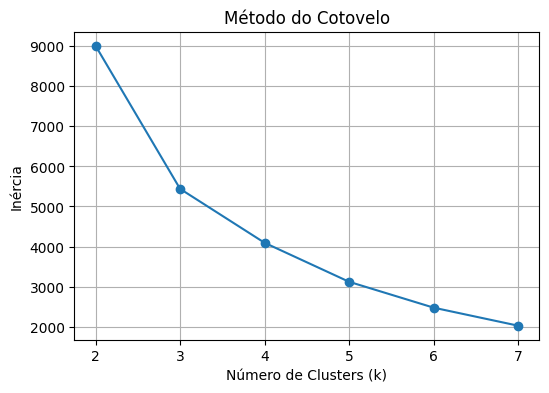

In [19]:
# Padronizar as variáveis RFM
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Determinar o número ideal de clusters pelo método do cotovelo
inertia = []
K = range(2, 8)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(rfm_scaled)
    inertia.append(km.inertia_)

# Exibir gráfico do cotovelo
plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'o-')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.grid(True)
plt.show()


--- Aplicação do K-Means e análise dos clusters

=== PERFIL MÉDIO DOS CLUSTERS ===


,Recency,Frequency,Monetary,Qtd_Clientes
Cluster,,,,
0,247.11,1.58,631.42,1082
1,41.45,4.67,1855.94,3230
2,6.04,66.42,85904.35,26


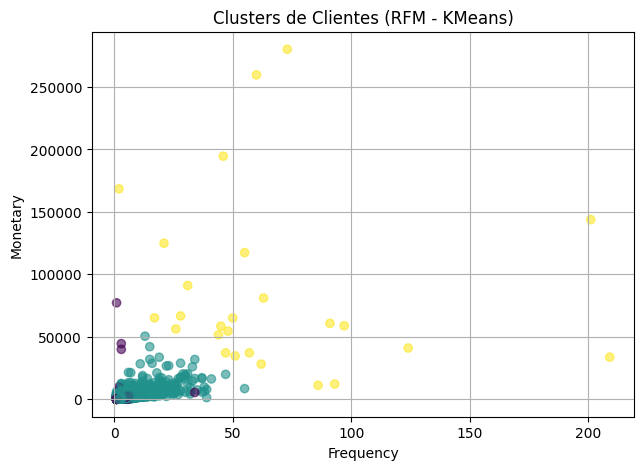

In [20]:
# Definir número de clusters (conforme o gráfico)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Métricas médias por cluster
rfm_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Qtd_Clientes'}).round(2)

print("=== PERFIL MÉDIO DOS CLUSTERS ===")
display(rfm_summary)

# Visualização: Frequency vs Monetary
plt.figure(figsize=(7,5))
plt.scatter(rfm['Frequency'], rfm['Monetary'], c=rfm['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Clusters de Clientes (RFM - KMeans)')
plt.grid(True)
plt.show()


## Análise dos Clusters (RFM - KMeans com k=3)

O modelo K-Means foi aplicado sobre as variáveis **Recency**, **Frequency** e **Monetary**, resultando em **3 grupos distintos de clientes**. A escolha de *k = 3* foi baseada no método do cotovelo, que indicou um ponto de inflexão claro nesse valor.

---

### Perfil médio dos clusters

| Cluster | Recency | Frequency | Monetary | Qtd_Clientes | Interpretação |
|:--------:|:--------:|:----------:|:-----------:|:--------------:|:---------------|
| **0** | 247.11 | 1.58 | 631.42 | 1082 | **Clientes inativos ou ocasionais** — não compram há muito tempo (recência alta), compram raramente e gastam pouco. Representam uma parcela significativa da base. **Estratégia:** campanhas de reativação e cupons de retorno. |
| **1** | 41.45 | 4.67 | 1855.94 | 3230 | **Clientes regulares** — compram com frequência razoável, possuem gasto médio e são relativamente recentes. É o **segmento principal**. **Estratégia:** fidelização e aumento do ticket médio. |
| **2** | 6.04 | 66.42 | 85,904.35 | 26 | **Clientes VIP** — compraram muito recentemente, com altíssima frequência e valor monetário elevado. Embora poucos, representam grande valor financeiro. **Estratégia:** atendimento premium e programas de retenção personalizados. |

---

### Principais insights

- O modelo identificou **três níveis claros de relacionamento** com a empresa:
  1. **Cluster 2 (VIPs)** → Clientes de altíssimo valor e alta frequência de compra.  
  2. **Cluster 1 (Fieis/Ativos)** → Base regular e mais numerosa, com potencial de crescimento.  
  3. **Cluster 0 (Inativos/Ocasional)** → Clientes que precisam de estímulo para voltar a comprar.

- O gráfico **Frequency × Monetary** evidencia claramente a separação entre grupos, destacando o cluster VIP (em amarelo) com movimentação financeira muito superior.

---

### Conclusão

A segmentação RFM com *k = 3* permitiu identificar grupos de clientes com comportamentos distintos, possibilitando **ações direcionadas de marketing e retenção**:
- **Reativar** os inativos,  
- **Fidelizar** os regulares, e  
- **Premiar e reter** os VIPs.

Essa abordagem aumenta a eficiência das estratégias comerciais e melhora a alocação de recursos de marketing.


- Visualizações complementares.

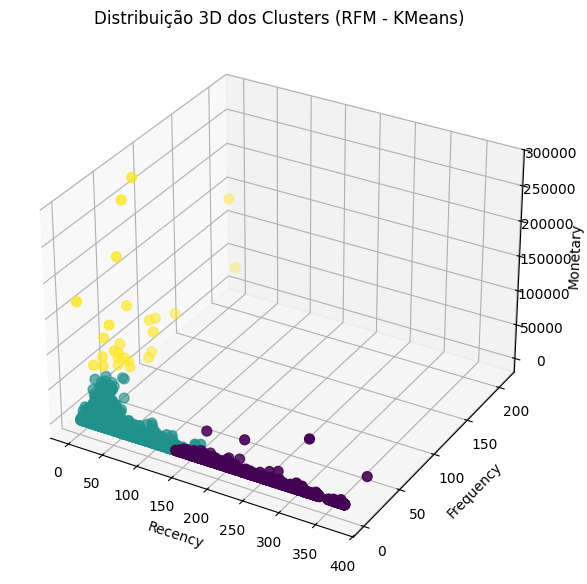

In [23]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'],
           c=rfm['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Distribuição 3D dos Clusters (RFM - KMeans)')
plt.show()

**Síntese Visual:**  
- Observa-se uma clara **separação tridimensional** entre os grupos:  
  - Os pontos amarelos (Cluster 2) concentram-se em valores altos de *Frequency* e *Monetary*, representando o topo da pirâmide de clientes.  
  - Os verdes (Cluster 1) ocupam o meio, enquanto os roxos (Cluster 0) estão na base com baixo engajamento.  

Essa visualização confirma a **efetividade da segmentação via RFM**, permitindo que ações de marketing e relacionamento sejam direcionadas conforme o perfil de valor de cada cliente.

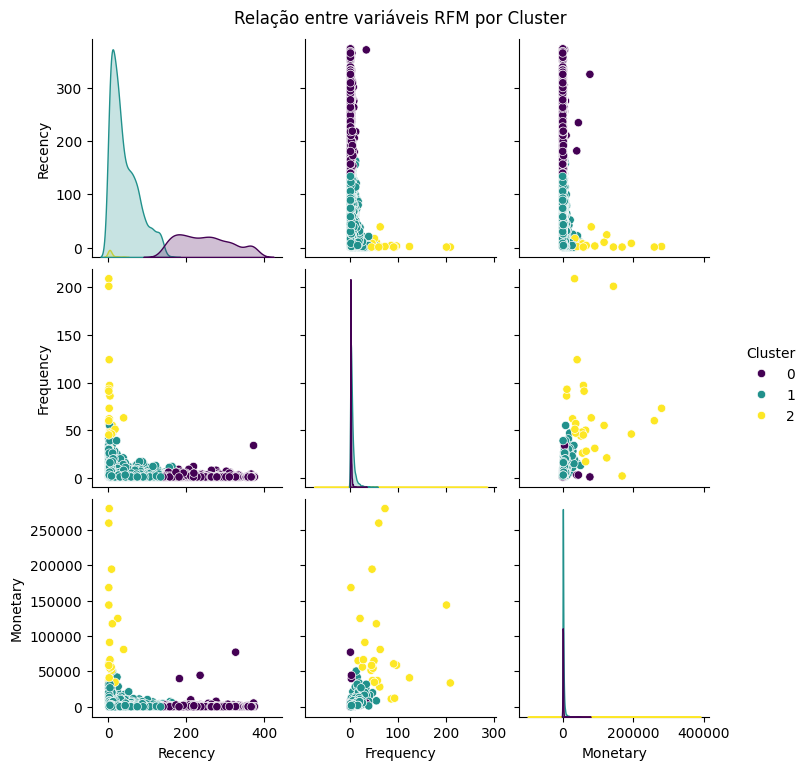

In [25]:
sns.pairplot(rfm, vars=['Recency', 'Frequency', 'Monetary'],
             hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Relação entre variáveis RFM por Cluster', y=1.02)
plt.show()


- Estratégias por Segmentação de clientes.

- Cluster 0 - Clientes Inativo/Ocasionais (Nâo fidelizados)

Representam clientes que se desconectaram da marca

Potencial de recuperação através de estratégias adequadas

Grupo que requer atenção para evitar perda total

**Estratégias Recomendadas:**

Campanhas de reativação com cupons de retorno

Pesquisa para entender motivos da inatividade

Comunicação personalizada baseada no histórico

- Cluster 1 - Clientes Fidelizados

Formam a "espinha dorsal" do negócio

Clientes fiéis com potencial de crescimento

Segmento crucial para sustentabilidade

**Estratégias Recomendadas:**

Programas de fidelidade com benefícios tiered

Cross-selling de produtos relacionados

Incentivos para aumento do ticket médio


- Cluster 2 - Clientes VIP:

Representam a elite de clientes

Pequeno em quantidade, mas enorme em valor

Requerem cuidados especiais para retenção

**Estratégias Recomendadas:**

Atendimento premium e personalizado

Acesso antecipado a lançamentos

Eventos exclusivos e presentes

Gestor de conta dedicado

--- Relevância Prática para o Negócio

- Para a Estratégia de Marketing
Segmentação Precisas: Permite comunicação personalizada para cada perfil de cliente

Campanhas Direcionadas: Mensagens específicas baseadas no comportamento real de compra

Otimização de Orçamento: Foco nos clientes com maior potencial de retorno

- Para as Vendas e Produto
Bundle Strategy: Oportunidade clara para criação de kits da coleção Regency

Recomendações Inteligentes: Algoritmos de cross-selling baseados em padrões reais

Desenvolvimento de Produto: Investir em linhas com comportamento similar ao da coleção Regency

- Para a Experiência do Cliente
Jornada Personalizada: Tratamento diferenciado para clientes VIP

Programas de Fidelidade: Estratégias baseadas no valor real do cliente

Retenção Proativa: Identificação precoce de clientes em risco de abandono


--- Recomendações Estratégicas Integradas
- Imediatas (Curto Prazo)
Criação do Kit "Coleção Completa Regency"

Agrupar as três cores com preço especial

Divulgação destacada no e-commerce

Sistema de Recomendações Automatizado

Implementar cross-selling: "Clientes que compraram esta cor também levaram..."

Banner promocional no carrinho: "Complete sua coleção"

Campanha de Reativação Segmentada

Oferta especial da coleção Regency para o Cluster Inativo

Cupom de desconto progressivo para múltiplas unidades

- Estratégicas (Médio/Longo Prazo)
Programa de Fidelidade Tiered

Benefícios escalonados por cluster

Eventos exclusivos para clientes VIP

Expansão da Linha Regency

Desenvolver produtos complementares (potes, bandejas)

Lançar novas cores baseadas no sucesso atual

Dashboard de Monitoramento Contínuo

Acompanhamento em tempo real da migração entre clusters

Alertas para mudanças nos padrões de associação


--- Métricas de Sucesso Esperadas
- Indicadores Quantitativos
Aumento de 15-20% no ticket médio dos Clusters Regular e Inativo

Redução de 25% na taxa de churn do Cluster Inativo

Retenção de 95% dos clientes VIP

Crescimento de 30% nas vendas da coleção Regency

- Indicadores Qualitativos
Melhoria na satisfação do cliente (NPS)

Fortalecimento da percepção da marca

Aumento do lifetime value dos clientes


--- Visão de Futuro

Os resultados deste trabalho fornecem alicerces data-driven para transformar a estratégia comercial. A integração entre segmentação de clientes (RFM) e análise de padrões de compra (associação) cria um ciclo virtuoso de:

Entender → Compreender o comportamento real dos clientes

Segmentar → Agrupar por valor e potencial

Agir → Implementar estratégias direcionadas

Mensurar → Acompanhar resultados e refinar abordagens

Esta abordagem permite não apenas otimizar resultados imediatos, mas também construir relacionamentos duradouros com os clientes, maximizando o valor para ambas as partes.

- Nota Final: A transformação de dados em insights acionáveis representa um diferencial competitivo sustentável no mercado atual, onde a personalização e relevância são expectativas básicas dos consumidores.